<a href="https://colab.research.google.com/github/vedanshu786/Introduction-to-Deep-Learning-and-its-Applications/blob/main/190056_VEDANSHU_SEHRA_PART_2%263.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/grive',force_remount=True)

Mounted at /content/grive


In [ ]:
df = pd.read_csv('/content/grive/MyDrive/House_prediction.csv')
df.head(40)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [ ]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [ ]:
city=[]
for i in range(0,len(df)):
  if str(df.iloc[i,0]) not in city:
    city.append(str(df.iloc[i,0]))
    
city

['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas', 'Belo Horizonte']

In [ ]:
sum_rent = [0]*len(city);
sum_area = [0]*len(city);
sum_room = [0]*len(city);
sum_bathroom= [0]*len(city);
sum_parking= [0]*len(city);
sum_hoa= [0]*len(city);
sum_propertytax= [0]*len(city);
sum_fire= [0]*len(city);
instant_rent=[0]*len(city);
for j in range (0,len(city)):
  for i in range(0,len(df)):
    if df.iloc[i,0]==city[j]:

      sum_rent[j] = sum_rent[j]+df.iloc[i,9];
      sum_area[j] = sum_area[j]+df.iloc[i,1];
      sum_room[j] = sum_room[j]+df.iloc[i,2];
      sum_bathroom[j] = sum_bathroom[j]+df.iloc[i,3];
      sum_parking[j] = sum_parking[j]+df.iloc[i,4];
      sum_hoa[j]=sum_hoa[j]+df.iloc[i,8];
      sum_propertytax[j] = sum_propertytax[j]+df.iloc[i,10];
      sum_fire[j] = sum_fire[j] +df.iloc[i,11];
      instant_rent[j] = instant_rent[j]+1;

instant_rent


[5887, 1193, 1501, 853, 1258]

In [ ]:
avg_rent =[0]*len(city);
avg_area=[0]*len(city);
avg_room=[0]*len(city);
avg_bathroom=[0]*len(city);
avg_parking=[0]*len(city);
avg_hoa=[0]*len(city);
avg_propertytax=[0]*len(city);
avg_fire=[0]*len(city);

for i in range(0,len(city)):
  avg_rent[i] = sum_rent[i]/instant_rent[i];
  avg_area[i] = sum_area[i]/instant_rent[i];
  avg_room[i]=sum_room[i]/instant_rent[i];
  avg_bathroom[i]=sum_bathroom[i]//instant_rent[i];
  avg_parking[i]=sum_parking[i]/instant_rent[i];
  avg_hoa[i]=sum_hoa[i]/instant_rent[i];
  avg_propertytax[i]=sum_propertytax[i]/instant_rent[i];
  avg_fire[i]=sum_fire[i]/instant_rent[i];


Text(0, 0.5, 'AVERAGE RENT')

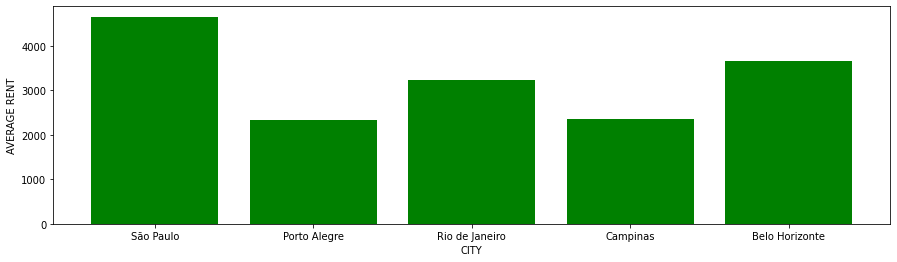

In [ ]:
import matplotlib.pyplot as plt
a = city
b = avg_rent
width = 0.5
f = plt.figure()
f.set_figwidth(15)
plt.bar(a,b,color='green') 
plt.xlabel('CITY')
plt.ylabel('AVERAGE RENT')

Text(0, 0.5, 'AVERAGE AREA')

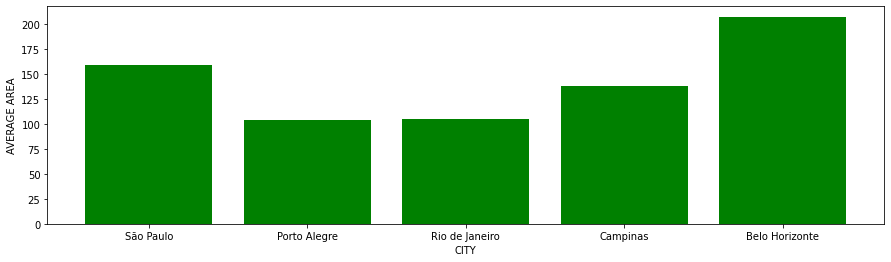

In [ ]:
a = city
b = avg_area
width = 0.5
f = plt.figure()
f.set_figwidth(15)
plt.bar(a,b,color='green') 
plt.xlabel('CITY')
plt.ylabel('AVERAGE AREA')

Text(0, 0.5, 'AVERAGE ROOMS')

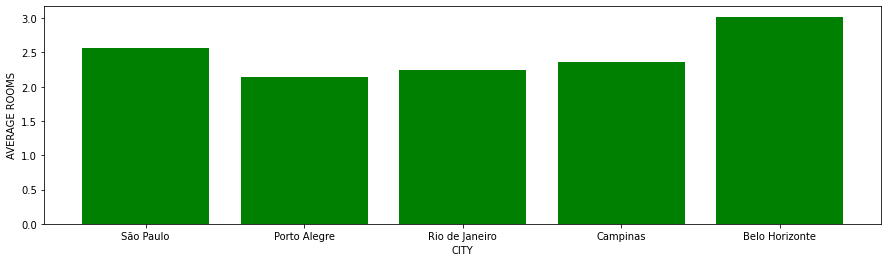

In [ ]:
a = city
b = avg_room
width = 1
f = plt.figure()
f.set_figwidth(15)
plt.bar(a,b,color='green') 
plt.xlabel('CITY')
plt.ylabel('AVERAGE ROOMS')

Text(0, 0.5, 'AVERAGE BATHROOM')

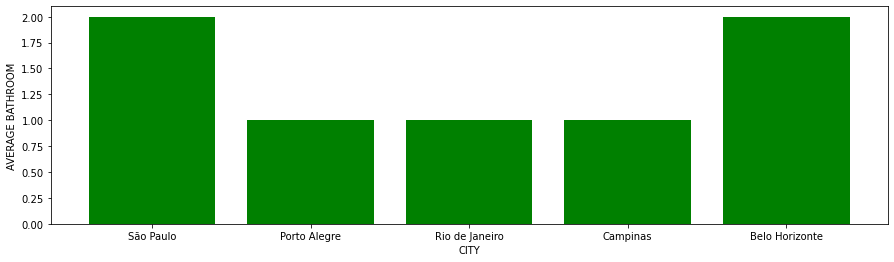

In [ ]:
a = city
b = avg_bathroom
width = 1
f = plt.figure()
f.set_figwidth(15)
plt.bar(a,b,color='green') 
plt.xlabel('CITY')
plt.ylabel('AVERAGE BATHROOM')

Text(0, 0.5, 'AVERAGE PARKINGS')

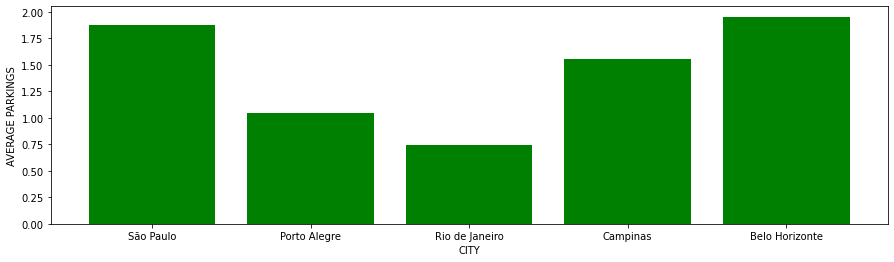

In [ ]:
a = city
b = avg_parking
width = 1
f = plt.figure()
f.set_figwidth(15)
plt.bar(a,b,color='green') 
plt.xlabel('CITY')
plt.ylabel('AVERAGE PARKINGS')

Text(0, 0.5, 'AVERAGE HOA')

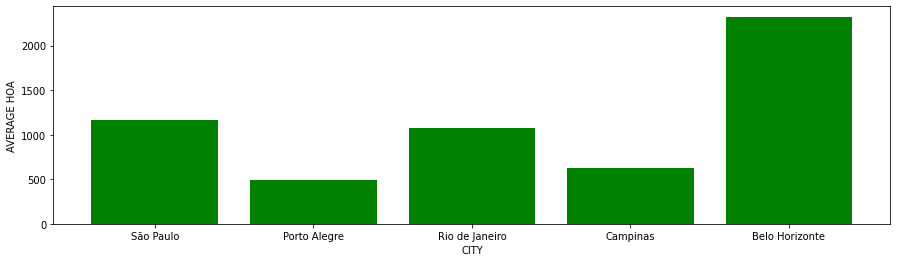

In [ ]:
a = city
b = avg_hoa
width = 1
f = plt.figure()
f.set_figwidth(15)
plt.bar(a,b,color='green') 
plt.xlabel('CITY')
plt.ylabel('AVERAGE HOA')

Text(0, 0.5, 'AVERAGE PROPERTY TAX')

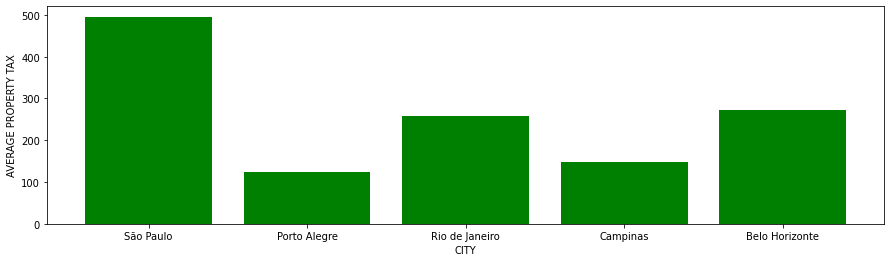

In [ ]:
a = city
b = avg_propertytax
width = 1
f = plt.figure()
f.set_figwidth(15)
plt.bar(a,b,color='green') 
plt.xlabel('CITY')
plt.ylabel('AVERAGE PROPERTY TAX')

Text(0, 0.5, 'AVERAGE FIRE')

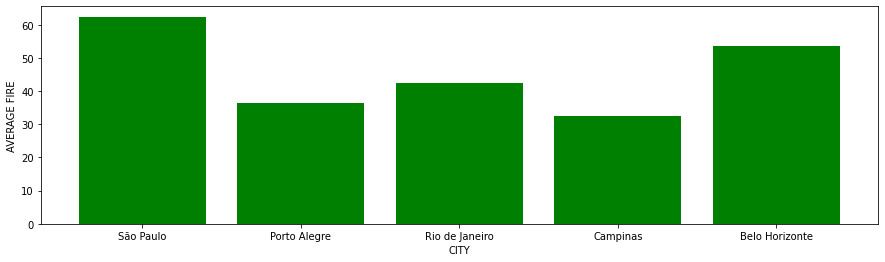

In [ ]:
a = city
b = avg_fire
width = 1
f = plt.figure()
f.set_figwidth(15)
plt.bar(a,b,color='green') 
plt.xlabel('CITY')
plt.ylabel('AVERAGE FIRE')

In [ ]:
# LETS US TRY TO FIND OUT SOME SORT OF DEPENDENCE

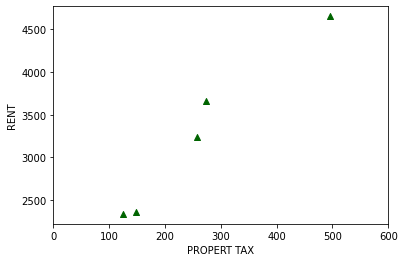

In [ ]:
#plt.plot(avg_propertytax, avg_rent, color='red', linewidth=3)
plt.scatter(avg_propertytax, avg_rent, color='darkgreen', marker='^')
plt.xlim(0,600)

plt.xlabel('PROPERT TAX')
plt.ylabel('RENT')
plt.show()

In [ ]:
#as the rent increases preperty_tax increases.


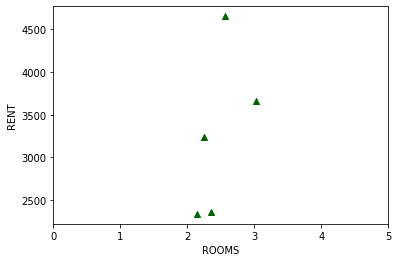

In [ ]:
plt.scatter(avg_room, avg_rent, color='darkgreen', marker='^')
plt.xlim(0,5)

plt.xlabel('ROOMS')
plt.ylabel('RENT')
plt.show()

In [ ]:
#NO CONCLUSION CAN BE DRAWN FROM IT.

In [ ]:
plt.scatter(avg_room, avg_rent, color='darkgreen', marker='^')
plt.xlim(0,5)

plt.xlabel('ROOMS')
plt.ylabel('RENT')
plt.show()